C:\Users\RVCCF103\AppData\Local\Temp\ipykernel_9752\3843365643.py:77: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  word_width, word_height = img.textsize(word, font=font)
C:\Users\RVCCF103\AppData\Local\Temp\ipykernel_9752\3843365643.py:77: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  word_width, word_height = img.textsize(word, font=font)
C:\Users\RVCCF103\AppData\Local\Temp\ipykernel_9752\3843365643.py:77: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  word_width, word_height = img.textsize(word, font=font)
C:\Users\RVCCF103\AppData\Local\Temp\ipykernel_9752\3843365643.py:77: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  word_width, word_height = img.textsize(w

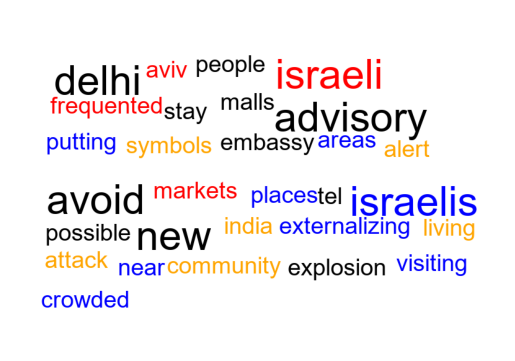

30


In [2]:
import nltk
import random
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize

def tokenize_word(text):
    return word_tokenize(text)
def lemmatize(word):
    lemmatizer=WordNetLemmatizer()
    return lemmatizer.lemmatize(word)
def preprocesstext(text):
    text = text.lower()
    words = tokenize_word(text)
    w = [word for word in words if not is_stop_word(word) and word != ',' and  word != '.']
    return w

def is_stop_word(word):
    stop_words=set(stopwords.words('english'))
    stop_words.add("asks")
    stop_words.add("particularly")
    stop_words.add("also")
    return word.lower() in stop_words
def calculatewordfreq(words):
    wordfreq = {}
    for word in words:
        wordfreq[word] = wordfreq.get(word,0) + 1
    return wordfreq
def createcloud(wordfreq,words,size = (600,500)):
    cloud = Image.new("RGB",size,"white")
    img = ImageDraw.Draw(cloud)
    displayedwords = set()
    x = 0
    y = 0
    prev = 0
    for word in words:
        if word not in displayedwords:
            f = wordfreq[word]
            fontsize = int(10 + 40*f/3)
            font = ImageFont.truetype("arial.ttf",fontsize)
            img.text((x,y),word,fill = "black", font = font)
            x += prev + 10
            if x + fontsize > 550:
                x = 10
                y += 50
            print(word, fontsize, x, y)
            displayedwords.add(word)
            prev = fontsize
    plt.imshow(cloud)
    plt.show()
def createcloud(wordfreq, words, size=(800, 550)):
    cloud = Image.new("RGB", size, "white")
    img = ImageDraw.Draw(cloud)
    displayedwords = set()
    x = 50
    y = 50
    pos = []
    f = []
    color = ["black", "red", "blue", "orange"]
    for i in range(0,35):
        v = random.randint(0,35)
        if v not in pos:
            pos.append(v)
        else:
            while v in pos:
                v = random.randint(0,35)
            pos.append(v)
        f.append(words[v])
    for word in f:
        l = wordfreq[word]
        word = word + " "
        if word not in displayedwords:

            fontsize = int(10 +  85* l / 3)
            font = ImageFont.truetype("arial.ttf", fontsize)
            word_width, word_height = img.textsize(word, font=font)
            if x + word_width + 10 > size[0]:
                x = 40
                y += word_height+18
            img.text((x+10+random.randint(0,15), y+15+random.randint(0,15)), word, fill= color[random.randint(0,3)], font=font)
            x += word_width
            displayedwords.add(word)
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()
text = """It is possible that the explosion near the Israeli embassy in New Delhi is an attack Tel Aviv has said, putting out an advisory for Israelis living in India and particularly in New Delhi. The advisory asks Israelis to avoid visiting crowded places such as malls and markets, particularly areas frequented by people from the community. It also asks them to stay alert and avoid externalizing Israeli symbols."""
words = preprocesstext(text)
wordfreq = calculatewordfreq(words)
createcloud(wordfreq,words)
print(len(wordfreq))